**DSCI 100 006 Group 38 Proposal**

**Title**: Predicting the likelihood of heart disease within a patient using 6 different factors.

**Introduction:**

The dataset that we will be using for this project is one related to heart disease and the factors that contribute towards it. Different factors such as blood pressure, cholesterol and even age can have great impacts on the risk of contracting heart disease and so this data set provides past details of patients with attributes they had and whether or not they were healthy or not.

The question that we will be addressing for our group project is, how do the age, sex, chest pain, cholesterol, max heart rate, and resting blood pressure factors affect the likelihood of developing heart disease?

Using a dataset found at this link, https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/, the data from the Cleveland dataset will be used. The original dataset contains 76 factors, however, the processed data, which is what will be used in our project, contains 14 factors. We will further filter this data to be the 6 factors that we will be examining, which we decided to be only the age, sex, chest pain type, resting blood pressure, cholesterol, and max heart rate factors.

**Preliminary exploratory data analysis:**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
heart_data<- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"), col_names = FALSE) |>
    select(X1, X2, X3, X4, X5, X8, X14)
colnames(heart_data) <- make.names(c("age", "sex", "pain.type", "restbps", "cholesterol", "maxbpm", "health"))

heart_data["health"][heart_data["health"] == 2 | heart_data["health"] == 3 | heart_data["health"] == 4] <- 1
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,pain.type,restbps,cholesterol,maxbpm,health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,150,0
67,1,4,160,286,108,1
67,1,4,120,229,129,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,115,1
57,0,2,130,236,174,1
38,1,3,138,175,173,0


In [3]:
heart_data_split <- initial_split(heart_data, prop = 0.75, strata = health)
heart_data_training <- training(heart_data_split)

In [4]:
health_freq <- table(heart_data$health)
rownames(health_freq) = c("Healthy", "Sick")
"# of Patients with and without Heart Disease"
health_freq

[1] "# of Patients with and without Heart Disease"


Healthy    Sick 
    164     139 

In [5]:
pred_avgs <- heart_data_training |>
    select(age, restbps, cholesterol, maxbpm) |>
    map(mean, na.rm = TRUE)
"Averages of the Predictor Variables"
pred_avgs

[1] "Averages of the Predictor Variables"

$age
[1] 54.53744

$restbps
[1] 131.6872

$cholesterol
[1] 246.6476

$maxbpm
[1] 149.3789

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



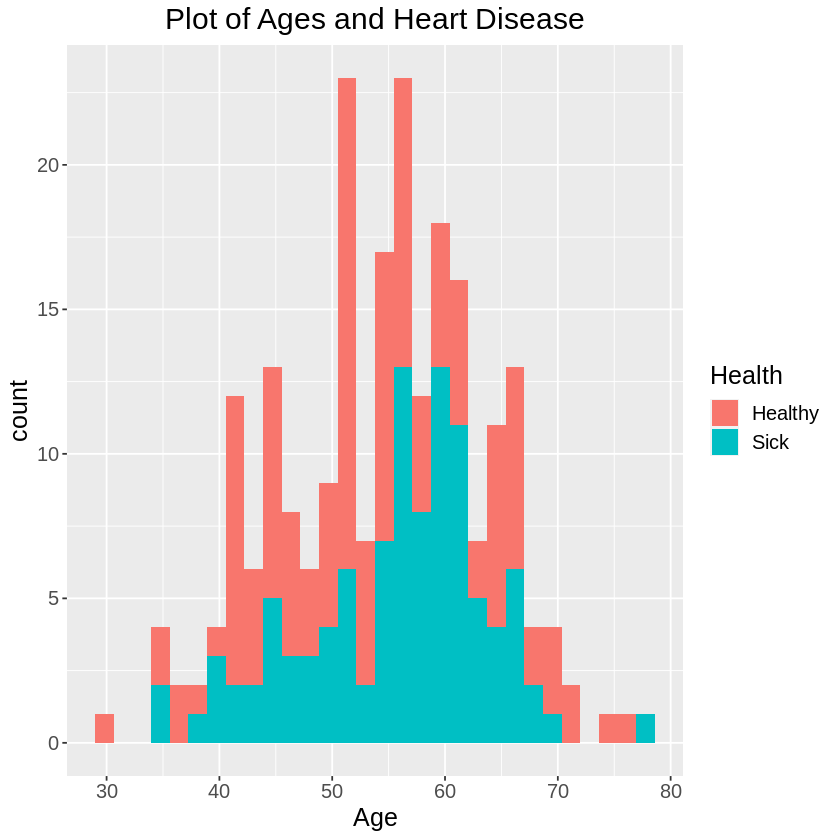

In [6]:
ages_and_heart_disease_plot <- heart_data_training |>
    ggplot(aes(x = age, fill = as_factor(health))) +
    geom_histogram() +
    labs(title = "Plot of Ages and Heart Disease", x = "Age", fill = "Health") +
    scale_fill_discrete(labels = c("Healthy", "Sick")) +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))
ages_and_heart_disease_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



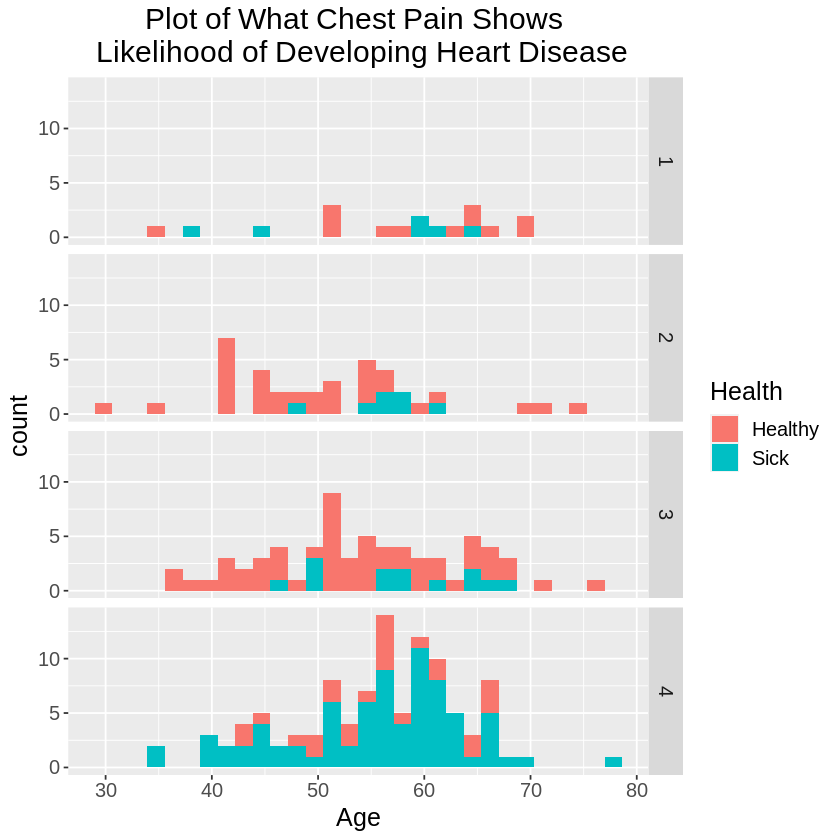

In [7]:
likelihood_of_heart_disease_plot <- heart_data_training |>
    ggplot(aes(x = age, fill = as_factor(health))) +
    geom_histogram() +
    facet_grid(rows = vars(pain.type)) +
    labs(title = "Plot of What Chest Pain Shows \n Likelihood of Developing Heart Disease", x = "Age", fill = "Health") +
    scale_fill_discrete(labels = c("Healthy", "Sick")) +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

likelihood_of_heart_disease_plot

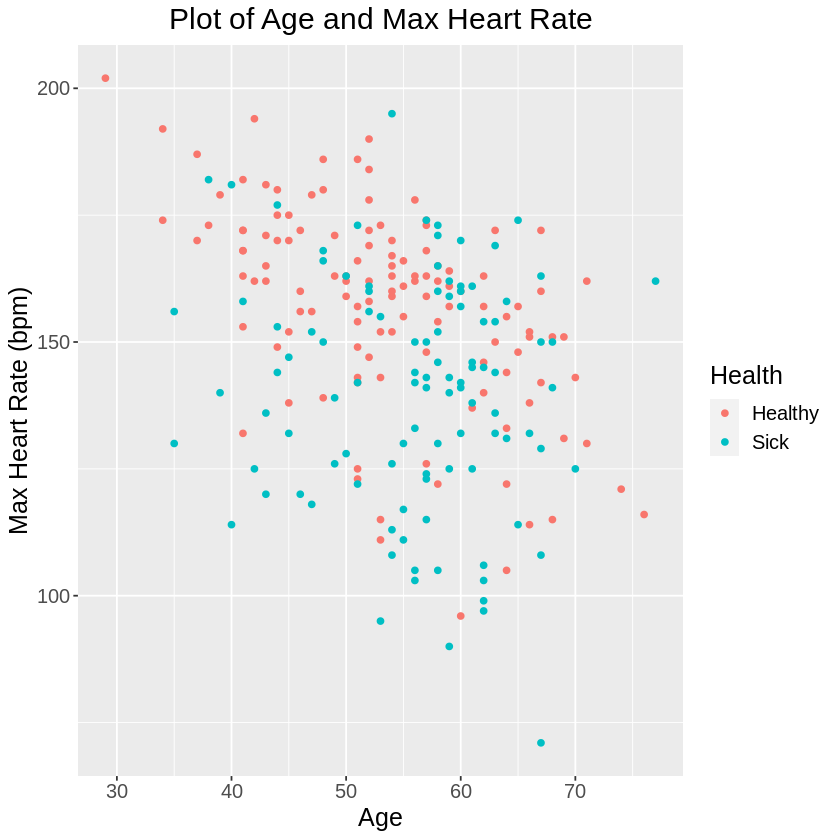

In [8]:
age_and_max_heart_rate_plot <- heart_data_training |>
    ggplot(aes(x = age, y = maxbpm, colour = as_factor(health))) +
    geom_point() +
    labs(title = "Plot of Age and Max Heart Rate", x = "Age", y = "Max Heart Rate (bpm)", colour = "Health") +
    scale_colour_discrete(labels = c("Healthy", "Sick")) +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))
age_and_max_heart_rate_plot

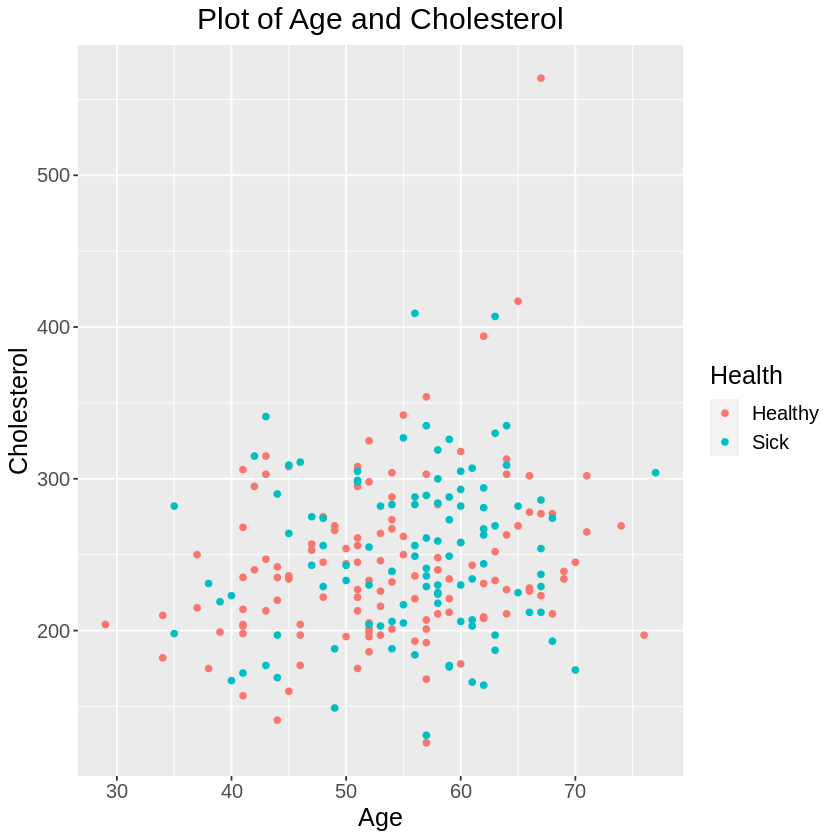

In [9]:
age_and_cholesterol_plot <- heart_data_training |>
    ggplot(aes(x = age, y = cholesterol, colour = as_factor(health))) +
    geom_point() +
    labs(title = "Plot of Age and Cholesterol", x = "Age", y = "Cholesterol", colour = "Health") +
    scale_colour_discrete(labels = c("Healthy", "Sick")) +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))
age_and_cholesterol_plot

**Methods:**

After visualizing the scatter plots and histogram of each variable which is colored by health. We will use the KNN classification model to predict the likelihood of heart disease within a patient according to 6 factors.

How to visualize: 

We will build multiple models to investigate the relationship between 6 factors and heart disease:
- Age and health
- Sex and health
- Chest pain type and health
- Resting blood pressure and health
- Cholesterol and health
- Max heart rate factors and health

This will help us to analyze the predictors that are relevant to the heart disease by visualizing the distribution of the effects of the predictors on the 6 different factors.

**Expected outcomes and significance:**

We expect to find a clear relationship between the factors, such as a higher cholesterol level or high blood pressure, resulting in a higher risk of developing heart disease. In addition, we expect the greater the age, the greater the probability of heart disease. One factor that would be interesting to understand is if there is any significance in the sex of a person when studying heart disease. We expect women to be more likely to have heart disease than men.

The impact that such findings could have are quite great as it allows people to be better prepared for such scenarios, and can potentially prevent heart disease from developing entirely if they find, for instance, their resting blood pressure to be in a sort of "danger" zone in terms of contracting heart disease. Especially with the elderly, they can try and live a lifestyle that doesn't put them in a position where heart disease is a more than likely occurrence.

These findings could have a great impact on future research such as what potential treatments are there to help prevent these diseases before they happen, in terms of lowering cholesterol levels, reducing resting blood pressure, and the like.